In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Logistic Regression\bank-full.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  outcome    45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isnull().sum() # Checking if there are any Null Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
outcome      0
y            0
dtype: int64

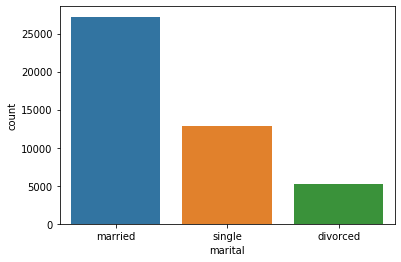

In [7]:
sns.countplot(x='marital',data=df)

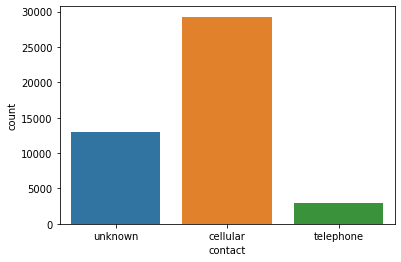

In [8]:
sns.countplot(x='contact',data=df)

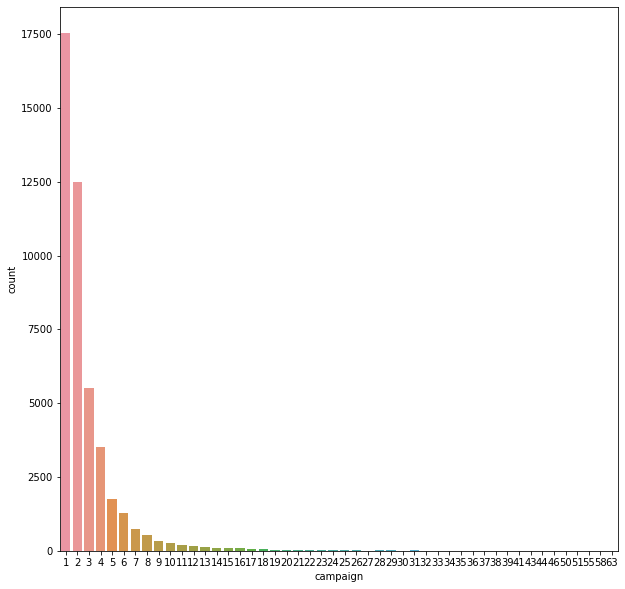

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x ='campaign',data=df)

In [10]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

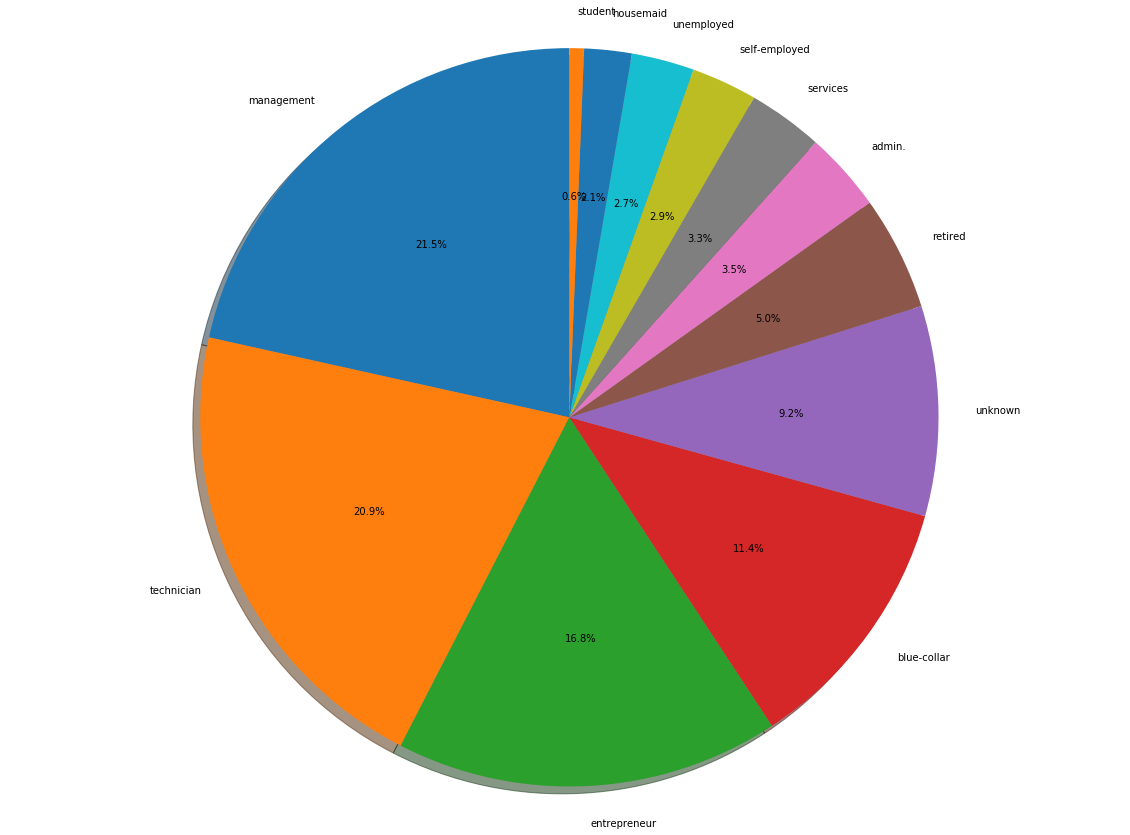

In [12]:
labels = 'management', 'technician', 'entrepreneur', 'blue-collar','unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'
sizes = df['job'].value_counts()
explode = (0, 0, 0, 0,0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(20,15))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [13]:
sns.set_style('whitegrid')

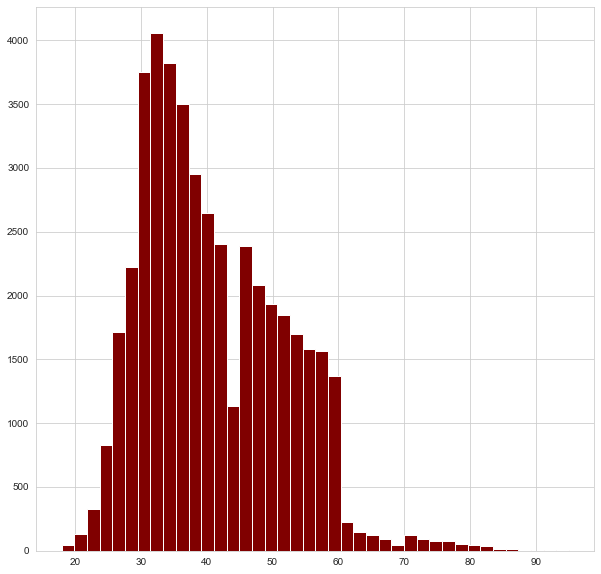

In [14]:
plt.figure(figsize=(10,10))
plt.hist(x='age',data=df,bins=40,color='maroon')
plt.show()

In [15]:
import cufflinks as cf

In [16]:
cf.go_offline()

In [17]:
df['age'].iplot(kind='hist')

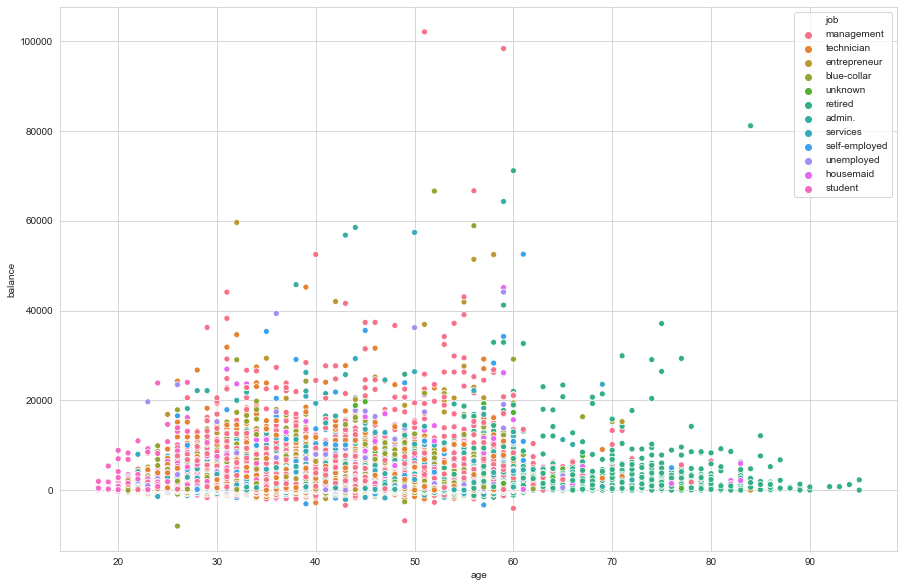

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='age', y='balance',hue='job',data=df,palette='husl')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='job',hue='education',data=df,palette='Set1')

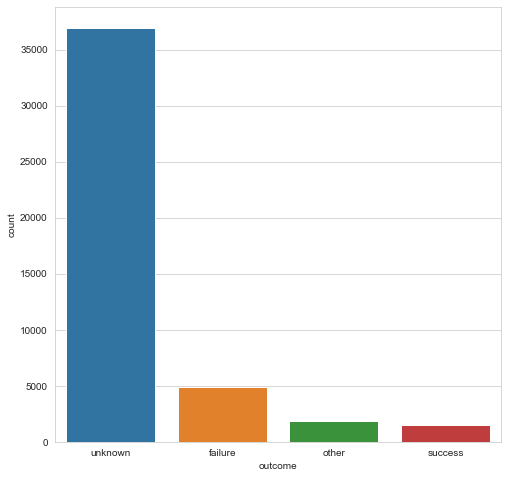

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(x='outcome',data=df)

In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [22]:
df.drop(['pdays','previous'],axis=1,inplace=True)

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,outcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


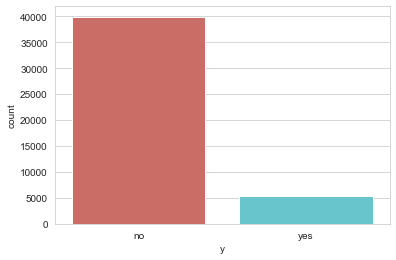

In [24]:
sns.countplot(df['y'],palette='hls')
plt.show()

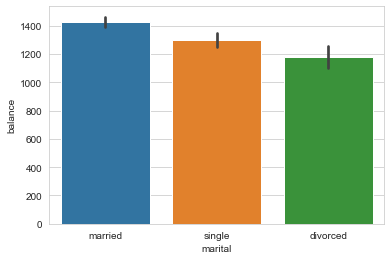

In [25]:
sns.barplot(x='marital',y='balance',data=df)

In [26]:
Count_Term_Submit = len(df[df['y']=='yes'])
Count_Term_NoSubmit = len(df[df['y']=='no'])
percentage_NoSubmit = Count_Term_NoSubmit/(Count_Term_NoSubmit+Count_Term_Submit)
print('\nPercentage of the clients who have not subscribed a term deposit : ', str(round(percentage_NoSubmit*100,2)),'%')
percentage_Submit = Count_Term_Submit/(Count_Term_NoSubmit+Count_Term_Submit)
print('\nPercentage of the client who have subscribed a term deposit : ', str(round(percentage_Submit*100,2)),'%')


Percentage of the clients who have not subscribed a term deposit :  88.3 %

Percentage of the client who have subscribed a term deposit :  11.7 %


In [27]:
df.groupby('y').mean()

,age,balance,day,duration,campaign
y,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047


In [28]:
df.groupby('job').mean()

,age,balance,day,duration,campaign
job,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968
management,40.449567,1763.616832,16.114189,253.995771,2.864348
retired,61.626767,1984.215106,15.439488,287.361307,2.346731
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072
services,38.740250,997.088108,15.635532,259.318729,2.718344
student,26.542644,1388.060768,14.897655,246.656716,2.299574


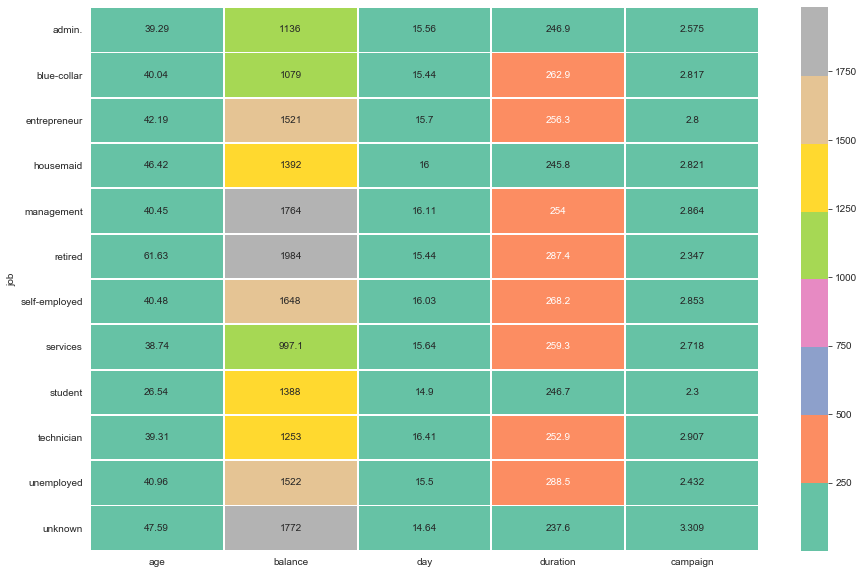

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(df.groupby('job').mean(),annot=True,fmt='.4g',cmap='Set2',linewidths=1)

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'outcome',
       'y'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
Lbe = LabelEncoder()

In [33]:
# Transforming data to numerical form using Label Encoder.

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = Lbe.fit_transform(df[column])
    else:
        pass
    

In [34]:
# Splitting data to X and Y Variable.

X = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'outcome']]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,outcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,3


In [35]:
Y = df['y']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [36]:
# Splitting data to train and test.

from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
LogR = LogisticRegression(solver='liblinear',random_state=0)

In [40]:
LogR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
LogR.classes_

array([0, 1])

In [42]:
LogR.intercept_

array([-2.40045962])

In [43]:
LogR.coef_

array([[ 4.06049077e-03,  3.11964816e-03,  1.75555357e-01,
         1.75181879e-01, -3.98482270e-01,  2.03177452e-05,
        -1.04631076e+00, -7.13370688e-01, -6.36175763e-01,
        -9.25073790e-03,  4.11079139e-02,  4.00690633e-03,
        -1.32261149e-01, -2.07665866e-01]])

In [44]:
y_prob = LogR.predict_proba(X_test)[:,1]
y_prob

array([0.01433155, 0.03712579, 0.27388649, ..., 0.09365722, 0.02691534,
       0.104946  ])

In [45]:
y_pred = LogR.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix

In [47]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[11769,  1246],
       [  244,   305]], dtype=int64)

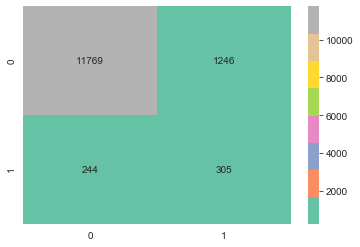

In [48]:
sns.heatmap(conf_mat,annot=True,fmt='.5g',cmap='Set2')

In [49]:
print('Model Accuracy :',str(round(accuracy_score(y_pred,y_test)*100,2)),'%')

Model Accuracy : 89.02 %


In [50]:
from sklearn import metrics

In [51]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LogR.predict_proba(X_test)[:,1])
FPR, TPR, Threshold

(array([0.00000000e+00, 8.32431533e-05, 2.49729460e-04, ...,
        9.43311413e-01, 9.43311413e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99935525, 1.        ,
        1.        ]),
 array([1.99998737e+00, 9.99987373e-01, 9.99968742e-01, ...,
        7.96197471e-03, 7.96107397e-03, 3.46245980e-05]))

In [52]:
ROC_AUC = roc_auc_score(y_pred,y_test)
ROC_AUC

0.7299099329833099

In [53]:
print('Classification report :\n\n',classification_report(y_test, y_pred))

Classification report :

               precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.56      0.20      0.29      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.87     13564



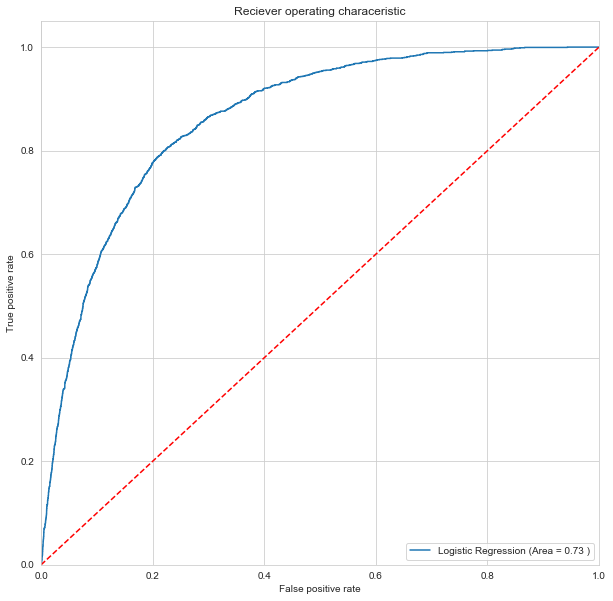

In [54]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label = 'Logistic Regression (Area = %0.2f )'% ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel("True positive rate")
plt.title('Reciever operating characeristic')
plt.legend(loc='lower right')

In [55]:
# We will now tune the data to see if it improves our result.

LogR1 = LogisticRegression(solver='liblinear',C=0.5,random_state=42)

In [56]:
LogR1.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
LogR1.predict_proba(X_test)[:,1]

array([0.01542125, 0.03829646, 0.28264127, ..., 0.09318078, 0.02777665,
       0.10465081])

In [58]:
y_pred = LogR1.predict(X_test)

In [59]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[11770,  1252],
       [  243,   299]], dtype=int64)

In [60]:
Accuracy = accuracy_score(y_pred,y_test)
print('Model Accuracy :',str(round(accuracy_score(y_pred,y_test)*100,2)),'%')
print('\nAfter Tuning the Accuracy seem to have decreased so we will neglect this model and change the threshold value.')

Model Accuracy : 88.98 %

After Tuning the Accuracy seem to have decreased so we will neglect this model and change the threshold value.


In [61]:
threshold = [0.1,0.25,0.8,0.9]

In [62]:
for i in threshold:
    Logistic_grid = ((LogR.predict_proba(X_test)[:, 1])>= i).astype(int)
    print('Valuation for test data only :',[i])
    print(classification_report(y_test, y_pred))
    print('Valuation for test data only  (new_threshold):')
    print(classification_report(y_test, Logistic_grid))
    print('----------------------------------------------------------------------\n\n')
    

Valuation for test data only : [0.1]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.19      0.29      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.61     13564
weighted avg       0.86      0.89      0.87     13564

Valuation for test data only  (new_threshold):
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     12013
           1       0.28      0.85      0.42      1551

    accuracy                           0.74     13564
   macro avg       0.63      0.78      0.63     13564
weighted avg       0.89      0.74      0.78     13564

----------------------------------------------------------------------


Valuation for test data only : [0.25]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12013
           1       0.55      0.19      0.2

In [63]:
FPR, TPR, Threshold = metrics.roc_curve(y_test, LogR1.predict_proba(X_test)[:,1])
FPR, TPR, Threshold

(array([0.00000000e+00, 8.32431533e-05, 2.49729460e-04, ...,
        9.49721135e-01, 9.49721135e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99935525, 1.        ,
        1.        ]),
 array([1.99998577e+00, 9.99985770e-01, 9.99964618e-01, ...,
        7.96210964e-03, 7.96068430e-03, 3.75363827e-05]))

In [64]:
ROC_AUC = roc_auc_score(y_test,y_pred)
ROC_AUC

0.5862753830567068

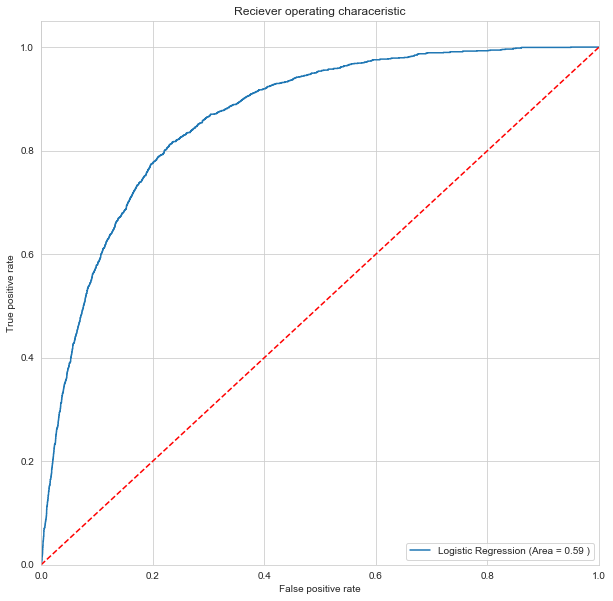

In [65]:
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label = 'Logistic Regression (Area = %0.2f )'% ROC_AUC)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel("True positive rate")
plt.title('Reciever operating characeristic')
plt.legend(loc='lower right')

In [95]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 3738
Before OverSampling, counts of label '0': 27909 

